In [ ]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 1: Frequency Domain Analysis - Resizing

Remember, we already did this using operation in the spatial domain (interpolation methods)? Now let's do the same thing using frequency domain analysis.

In [4]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-69a8vp0c
  Created wheel for ee604-plugins: filename=ee604_plugins-0.3.2-cp36-none-any.whl size=2311 sha256=7c3f1e698e58e7e53cd9e5e8b83439e545f84e09402707ee9c57c23ab8013485
  Stored in directory: /tmp/pip-ephem-wheel-cache-jjs5o_l5/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-69a8vp0c


In [5]:
# Importing required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

from ee604_plugins import download_dataset, cv2_imshow

download_dataset(assignment_no=3, task_no=1) # download data for this assignment

Download Complete!


In [17]:
def resize_ft(img, k=1):
    '''
    Write a program to resize the given image by a factor 'k90' using frequency domain analysis.
    
    Inputs:
    + img - Original image
    + k - resampling factor, therefore if input image size is 300x300 
        - and k=0.5 ==> output image size = 150x150
        - use int(k*input_image_size) to find the nearest integer
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8) containing the output image.
              - range should be between (0, 255) which may not be the case when u run the inverse DFT. 
              - Therefore, normalise the image by img = (img - min(img))/max(img) to rescale the values to (0, 255)
    
    Allowed external package:
    + You are allowed to use any cv2.dft or cv2.idft module or any other suitable module in numpy and cv2 
    + Just make sure you do not use any direct implementation.
    
    Hints:
    + For upscaling - pad the frquency domain signal with zeros around the center of the image. 
    + For downscaling - crop the frequency domain signal at the centre of required size.
    + PS - Make sure to use proper shift operation on output of cv2.dft so that your frequency domain signal 
         - assumes the centre of the image to be origin
    
    '''
    
    #############################
    # Start your code from here #
    #############################

    dft = np.fft.fft2(img)
    #print("dft",dft)

    dft_shift = np.fft.fftshift(dft)
    #print("dft_shift size:",dft_shift.shape)
    
    m,n = dft_shift.shape

    new_m, new_n = int(k*m), int(k*n)
    #print(dft_shift.dtype)

    first_m = abs(int(((k*m) - m)/2))
    first_n = abs(int(((k*n) - n)/2))
    back = np.zeros((new_m, new_n), dtype=complex)
    #print(first_m,first_n)

    if(k>=1):
      back[first_m:m+first_m, first_n:n+first_n] = dft_shift
    else:
      back = dft_shift[first_m:new_m+first_m, first_n:new_n+first_n]

    #print("dft_shift",dft_shift)
    #print("back",back)
    # shift origin from center to upper left corner
    back_ishift = np.fft.ifftshift(back)

    # do idft to get to the spatial domain from frequency domain
    img_back = np.fft.ifft2(back_ishift)

    # taking complex components of img_back
    img_back = np.abs(img_back)

    # re-normalize to 8-bits
    min, max = np.amin(img_back, (0,1)), np.amax(img_back, (0,1))
    out_img = cv2.normalize(img_back, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    
    #############################
    # End your code here ########
    #############################    
    
    return out_img

### Observations

Original


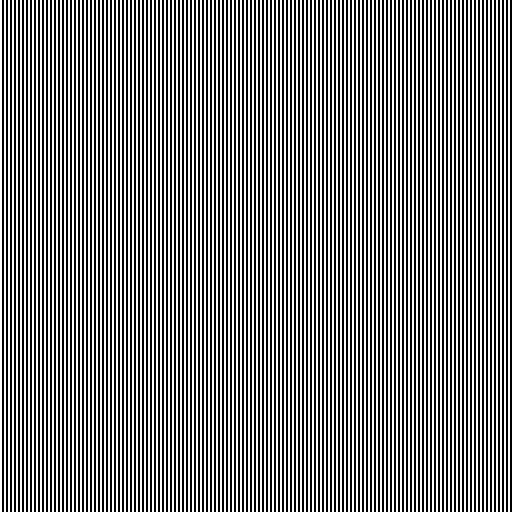

 k = 0.49


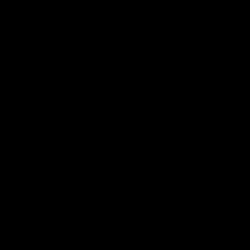

 k = 0.5


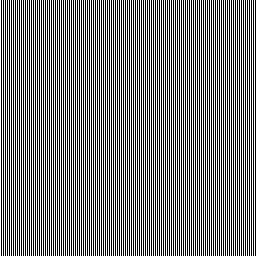

 k = 0.51


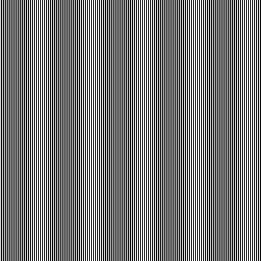

 k = 1.96


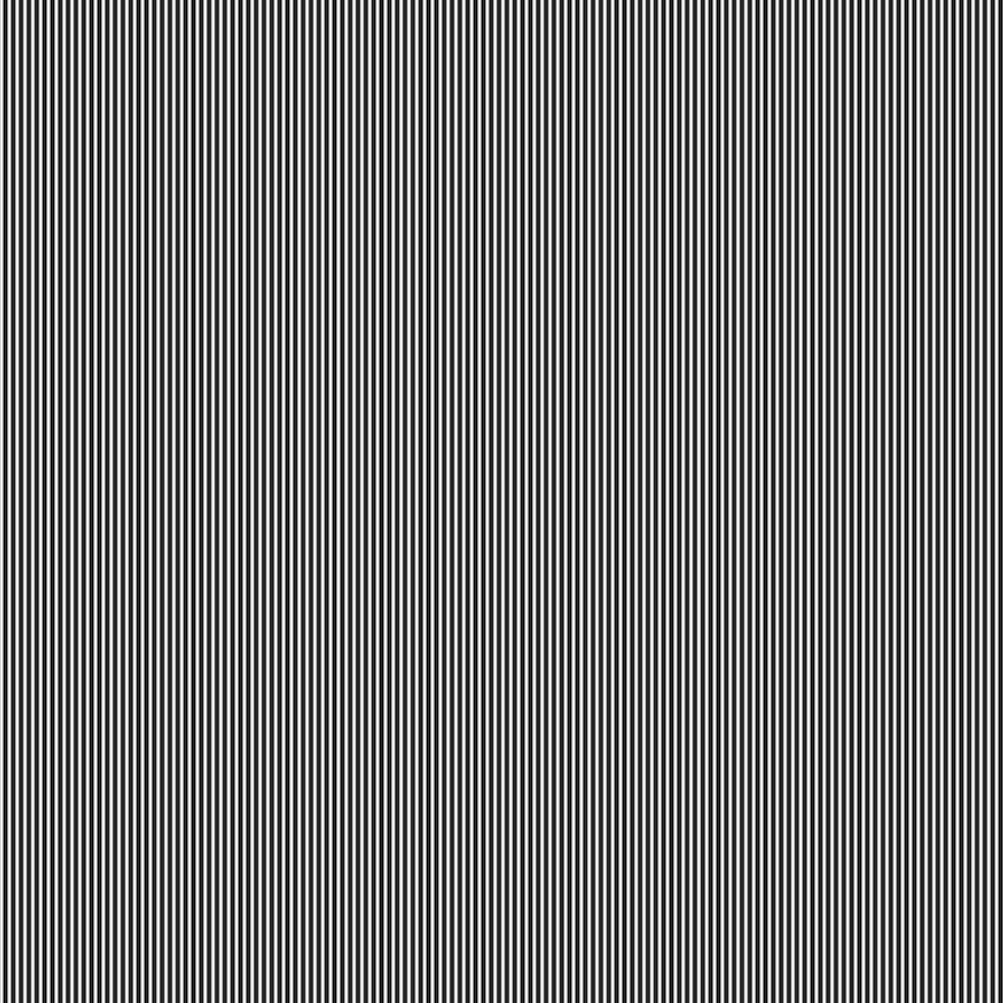

 k = 2


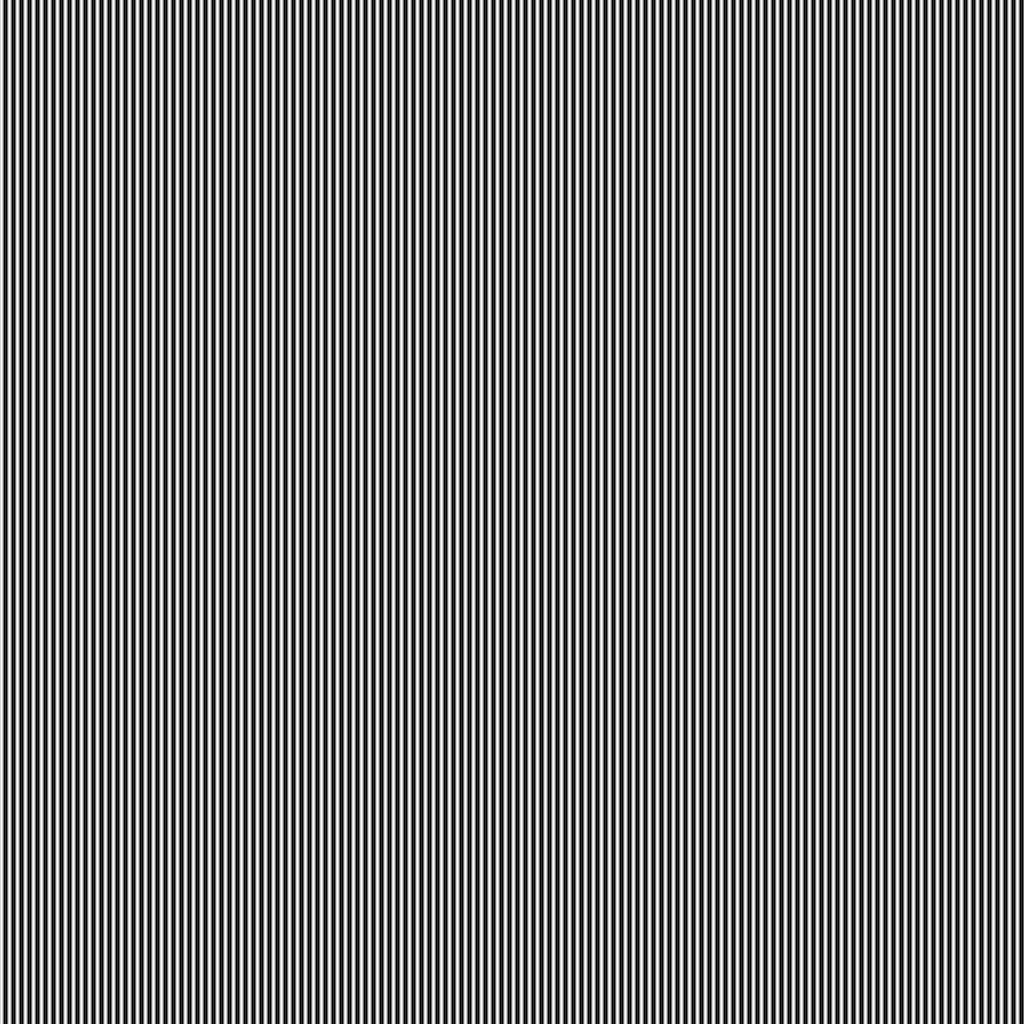

 k = 2.04


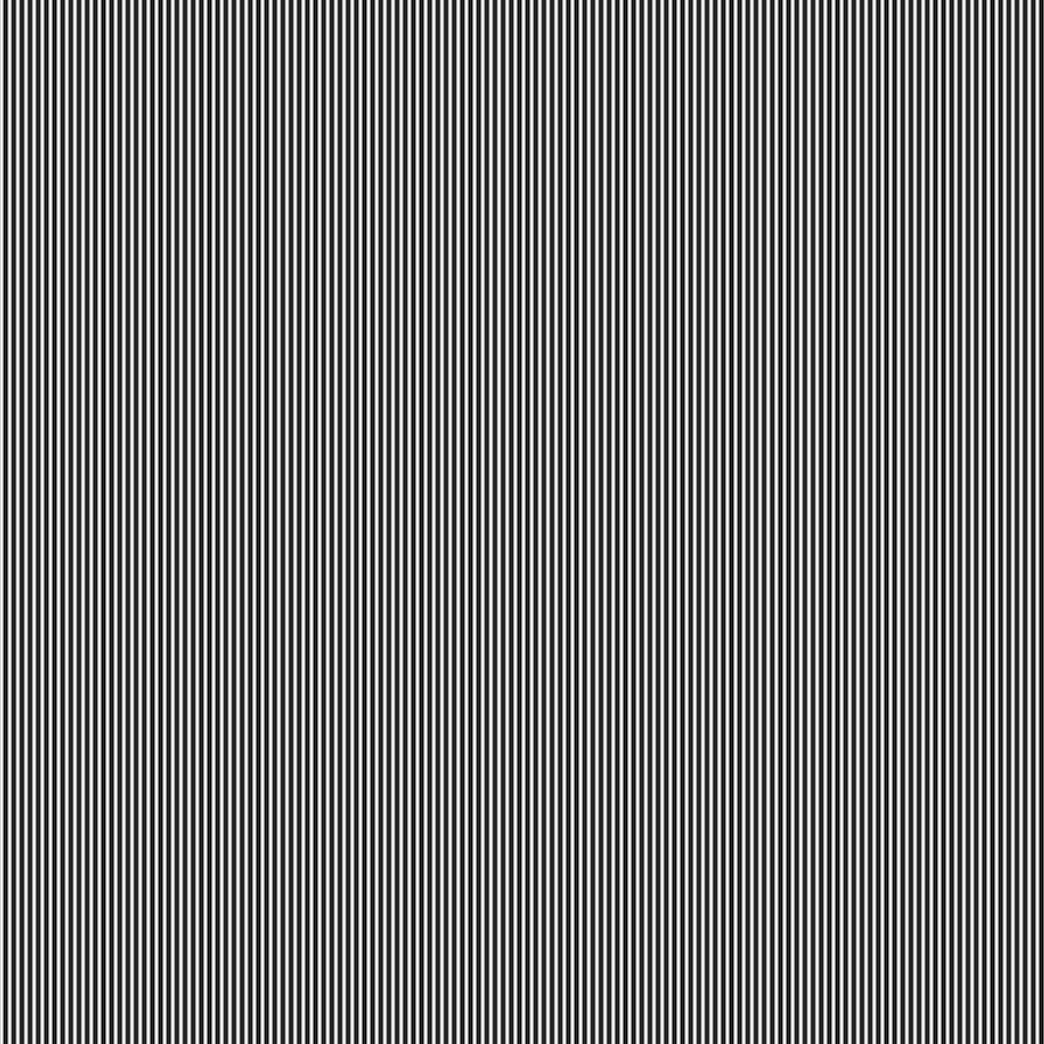

In [18]:
# Do not change codes inside this cell
# Add your observations in next cell
# Your observation should compare the output for different values of k

data = cv2.imread("data/parallel_lines.jpg", 0)

print("Original")
cv2_imshow(data)

for k in [0.49, 0.5, 0.51, 1.96, 2, 2.04]:
    tmp = resize_ft(data, k=k)
    print(" k = " + str(k))
    cv2_imshow(tmp)

In [19]:
your_observation = """
The image we have been given(parallel lines) contains a lot of high frequency components, which gets eliminated when we crop our frequency domain array 
for k=0.49. Hence we get only black image as output. I tried my code for "Lena Image" for k=0.49, and it resized it perfectly. Hence, implying it's the given image's fault :) For k=0.51, even if we do 
resizing in spatial domain, we get the same answer(have done the same in PA1,Task-2). For k>1, it already works perfectly.
"""

print(your_observation)


The image we have been given(parallel lines) contains a lot of high frequency components, which gets eliminated when we crop our frequency domain array 
for k=0.49. Hence we get only black image as output. I tried my code for "Lena Image" for k=0.49, and it resized it perfectly. Hence, implying it's the given image's fault :) For k=0.51, even if we do 
resizing in spatial domain, we get the same answer(have done the same in PA1,Task-2). For k>1, it already works perfectly.



In [21]:
# Submission >>>>>>>>>>>>>>>>>>>>>
# Do not change codes inside this cell.

gen_imgs = []
data = cv2.imread("data/parallel_lines.jpg", 0)

for k in [0.49, 0.5, 0.51, 1.96, 2, 2.04]:
    tmp = resize_ft(data, k=k)
    gen_imgs.append(tmp)

task1_submission = np.array(gen_imgs)